<a href="https://colab.research.google.com/github/Pranav003/Machine-Learning-project-1/blob/master/Copy_of_ML_for_grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv("/content/drive/MyDrive/train.csv",parse_dates=['date'], date_parser=d_parser)
# df = pd.read_csv('train.csv')
df.head()

<ipython-input-2-7d4a7aeea6c1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


converting string to datetime 

In [3]:
df['date'] = pd.to_datetime(df['date'])

Looking for name of day of particular date

In [4]:
df.loc[0,'date'].day_name()
df['Dayofweek']=df['date'].dt.day_name()

Counting the no. of days in the dataset from 1-1-2013 to 15-8-2017

In [5]:
df['date'].max() 
df['date'].min()
df['date'].max() -df['date'].min()

Timedelta('1687 days 00:00:00')

In [6]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,Dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Tuesday


making index as date and dropping id

In [7]:
df.set_index('date',inplace=True)
df = df.drop('id',axis=1)


Checking the change in prices over the time and this is week-wise data

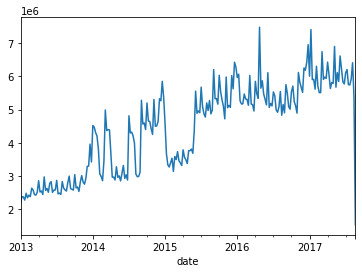

In [8]:
%matplotlib inline
weekwise_sales=df['sales'].resample('W').sum()
weekwise_sales.plot()

This shows change in sales in every year , all stores combined , and remember the data we have is only till 15-08-2017 so 2017 year is incomplete


Text(0, 0.5, 'Sales')

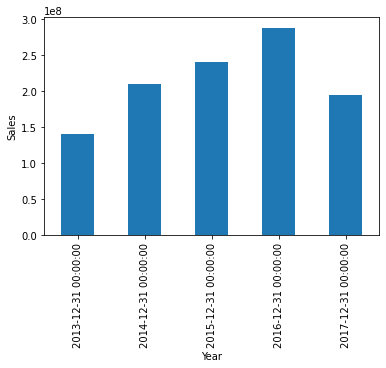

In [9]:
# This gives total sales in every year in our dataset
yearwise_sales=df['sales'].resample('Y').sum()
yearwise_sales.plot.bar()
plt.bar(yearwise_sales.index, yearwise_sales.values)
plt.xlabel("Year")
plt.ylabel("Sales")


We have 33 different families and 54 different store_nbr that i have checked using value_counts or nunique parameter

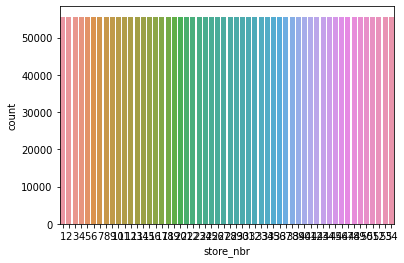

In [10]:
df['family'].nunique()
df['store_nbr'].nunique()
sns.countplot(x='store_nbr', data=df)
# This shows graph that there are equal no. of sales in each store

aggregated_data = df.groupby(['store_nbr', 'family', 'date']).agg({'sales':'sum', 'onpromotion':'sum'}).reset_index()



sales_ts = aggregated_data.set_index('date')[['sales']]
model = ExponentialSmoothing(sales_ts, seasonal_periods=30, trend='add', seasonal='add').fit()


Applying one hot encoding to df

In [11]:
df.head()

,store_nbr,family,sales,onpromotion,Dayofweek
date,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,Tuesday
2013-01-01,1,BABY CARE,0.0,0,Tuesday
2013-01-01,1,BEAUTY,0.0,0,Tuesday
2013-01-01,1,BEVERAGES,0.0,0,Tuesday
2013-01-01,1,BOOKS,0.0,0,Tuesday


In [12]:
df=df.drop('Dayofweek',axis=1)

In [31]:
from sklearn.model_selection import train_test_split
encoded_data = pd.get_dummies(df, columns=['store_nbr', 'family'])
X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop(columns=['sales']), encoded_data['sales'], test_size=0.2, random_state=42)

In [32]:
encoded_data.head()

,sales,onpromotion,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
 # One-hot encoding of 'store_nbr' and 'family' columns
encoded_data = pd.get_dummies(df, columns=['store_nbr', 'family'])
encoded_data.head()

,sales,onpromotion,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_train)
# poly.fit(X_poly, y_train)
# lin2 = LinearRegression()
# lin2.fit(X_poly, y_train)
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In linear regression R2 value is coming out to be 0.56.

When I apply L2 regularization to it , R2 value comes out to be 0.57 so not much improvement

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Mean Squared Error:  570258.1693140459
R2 Score:  0.5411548647978826


I tried exponential smoothening here but some error was coming which i wasn't able to resolve

In [ ]:
# aggregated_data = df.groupby(['store_nbr', 'family', 'date']).agg({'sales':'sum', 'onpromotion':'sum'}).reset_index()
# sales_ts = aggregated_data.set_index('date')[['sales']]
# model = ExponentialSmoothing(sales_ts, seasonal_periods=30, trend='add', seasonal='add').fit()

In [ ]:
# sales_ts = aggregated_data.set_index('date')[['sales']]
# model = ExponentialSmoothing(sales_ts, seasonal_periods=30, trend='add', seasonal='add').fit()


In [ ]:
# predictions = model.predict(start=pd.to_datetime('2013-01-01'), end=pd.to_datetime('2017-08-15'))
# mse = mean_squared_error(sales_ts['2013-01-01':'2018-12-15'], predictions)
# print(mse)


In [35]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Create the model
# model = ExponentialSmoothing(df['sales'], trend='add', seasonal='add', seasonal_periods=12)

# # Fit the model
# model_fit = model.fit()

# # Make predictions
# predictions = model_fit.predict(start=len(df), end=len(df) + 12)



In [36]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Get the actual values for the last 12 months
# y_true = df['sales'][-12:]

# # Calculate the MSE
# mse = mean_squared_error(y_true, predictions)
# print("Mean Squared Error: ", mse)

# # Calculate the R2 score
# r2 = r2_score(y_true, predictions)
# print("R2 Score: ", r2)


Trying using LSTM model here

In [37]:
df.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


Tried one hot encoding using pandas but it didn't work out , so after this i tried using sklearn which remembers the order . In this there were too many zeros so LSTM was showing Nan values and not working properly

In [38]:

encoded_data = pd.get_dummies(df, columns=['family'])
# df.head(4)

In [39]:
# #  from keras.layers import LeakyReLU

#  f1=encoded_data.loc[:, encoded_data.columns.str.startswith('family_')]
 
# x1 = encoded_data[['store_nbr','onpromotion']] + f1     
# y1 = encoded_data['sales']
# scaler = MinMaxScaler(feature_range=(0,1))

# x1 = scaler.fit_transform(x1)
# X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)

# # Reshaping data
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# # Defining the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))

# # Compiling adn fit mdoel
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_test, y_test))
# model.add(LSTM(64, activation=LeakyReLU(alpha=0.01)))
# #Making prediction on test data
# y_pred = model.predict(X_test)

In [40]:
# np.isnan(y_pred).any()

In [ ]:

# One-hot encode the "family" feature
encoder = OneHotEncoder(sparse=False)
family_encoded = encoder.fit_transform(df[["family"]])

# Concatenate the encoded feature with the other features
X = np.concatenate((df[["store_nbr", "onpromotion", "sales"]], family_encoded), axis=1)
# x= df[['store_nbr','onpromotion']]+family_encoded
y = df["sales"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using metrics such as mean squared error or r2_score
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Epoch 1/3
300089/300089 [==============================] - 1340s 4ms/step - loss: 785844.5625 - val_loss: 622990.0000
Epoch 2/3
300089/300089 [==============================] - 1384s 5ms/step - loss: 626956.8125 - val_loss: 543796.3125
Epoch 3/3
18756/18756 [==============================] - 36s 2ms/step
Mean Squared Error: 564508.7126063951
R2 Score: 0.5354018293273987


In [ ]:
print(np.shape(encoder.fit_transform(df[["family"]])),np.shape(df['store_nbr']),np.shape(df['onpromotion']),np.shape(df['sales']))

(3000888, 33) (3000888,) (3000888,) (3000888,)


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [50]:
categorical_vars = ['onpromotion', 'family', 'store_nbr']
categorical_transformer = OneHotEncoder()
preprocessed = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_vars)
    ])

In [52]:
model = RandomForestRegressor()
pipeline = Pipeline(steps=[('preprocessor', preprocessed),
                          ('model', model)])

In [55]:
X = df.drop(['sales'], axis=1)
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
print("Test score:", pipeline.score(X_test, y_test))